# Advanced DataFrame handling

## Aligning countries number of cases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

In [10]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [13]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,15,15,15,19,19,19,19,21,21,23
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,770,822,833,853,881,921,937,967,1013,1039
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,93,96,96,96,99,100,103,103,103,102
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863


In [14]:
longdf = df.rename(columns={'Country/Region':'country'}).set_index('country', drop=True)
# i like to use column names that are all lowercase and that can be identifiers (i.e. variable names)
# see here: https://www.programiz.com/python-programming/keywords-identifier
print('set new index:\n', longdf.head())

longdf = longdf.drop(columns=['Lat', 'Long', 'Province/State'])
longdf.columns.name = 'dates'  # all the columns correspond to dates now, so let's give columns a name
# this column name will show up later after stacking
print('drop unnecessary columns:\n', longdf.head())

longdf = longdf.stack()
# let's give this new series a name
longdf.name = 'cases'
# this series name will show up later after reseting index
print('stack all columns -> creates pd.Series:\n', longdf.head())

longdf = longdf.reset_index()
print('reset index -> creates pd.DataFrame in this case:\n', longdf.head())

print('check the datatypes in each column:\n', longdf.dtypes)
# dates is an object and not a pandas datetime!!! -> we want to have pandas datetime
# luckily pandas has a nice functionality to infer datetimes
# let's reassign date
# and we want dates in units of days
longdf['dates'] = pd.to_datetime(longdf['dates']).astype('datetime64[D]')
print('check the datatypes in each column again:\n', longdf.dtypes)


set new index:
             Province/State      Lat     Long  1/22/20  1/23/20  1/24/20  \
country                                                                   
Afghanistan            NaN  33.0000  65.0000        0        0        0   
Albania                NaN  41.1533  20.1683        0        0        0   
Algeria                NaN  28.0339   1.6596        0        0        0   
Andorra                NaN  42.5063   1.5218        0        0        0   
Angola                 NaN -11.2027  17.8739        0        0        0   

             1/25/20  1/26/20  1/27/20  1/28/20  ...  4/4/20  4/5/20  4/6/20  \
country                                          ...                           
Afghanistan        0        0        0        0  ...     299     349     367   
Albania            0        0        0        0  ...     333     361     377   
Algeria            0        0        0        0  ...    1251    1320    1423   
Andorra            0        0        0        0  ...     4

In [16]:
# this is a very short example of how to use groupby 
# (there are many options of how to use it and what it can spit out, please look at the doc)
# let's align to the day of xth case
no_cases_exceeds = 10

def align_dates(df):
    # groupby will throw the dataframe at you with each groupby iteration for one country in this case
    # take the earliest date where cases exceeds a certain number
    min_date = (df['dates'][df['cases'] > no_cases_exceeds]).min()
    # subtract min_date to get alignment to no_cases_exceeds
    # assign this to a new column
    # and we just care about days with use the timedelta days attribute
    df['aligned_days'] = (df['dates'] - min_date).astype('timedelta64[D]')
    return df

# we get a new longdf with the an additional column called aligned_days
new_longdf = longdf.groupby('country').apply(align_dates)
print(new_longdf.head())

       country      dates  cases  aligned_days
0  Afghanistan 2020-01-22      0         -52.0
1  Afghanistan 2020-01-23      0         -51.0
2  Afghanistan 2020-01-24      0         -50.0
3  Afghanistan 2020-01-25      0         -49.0
4  Afghanistan 2020-01-26      0         -48.0


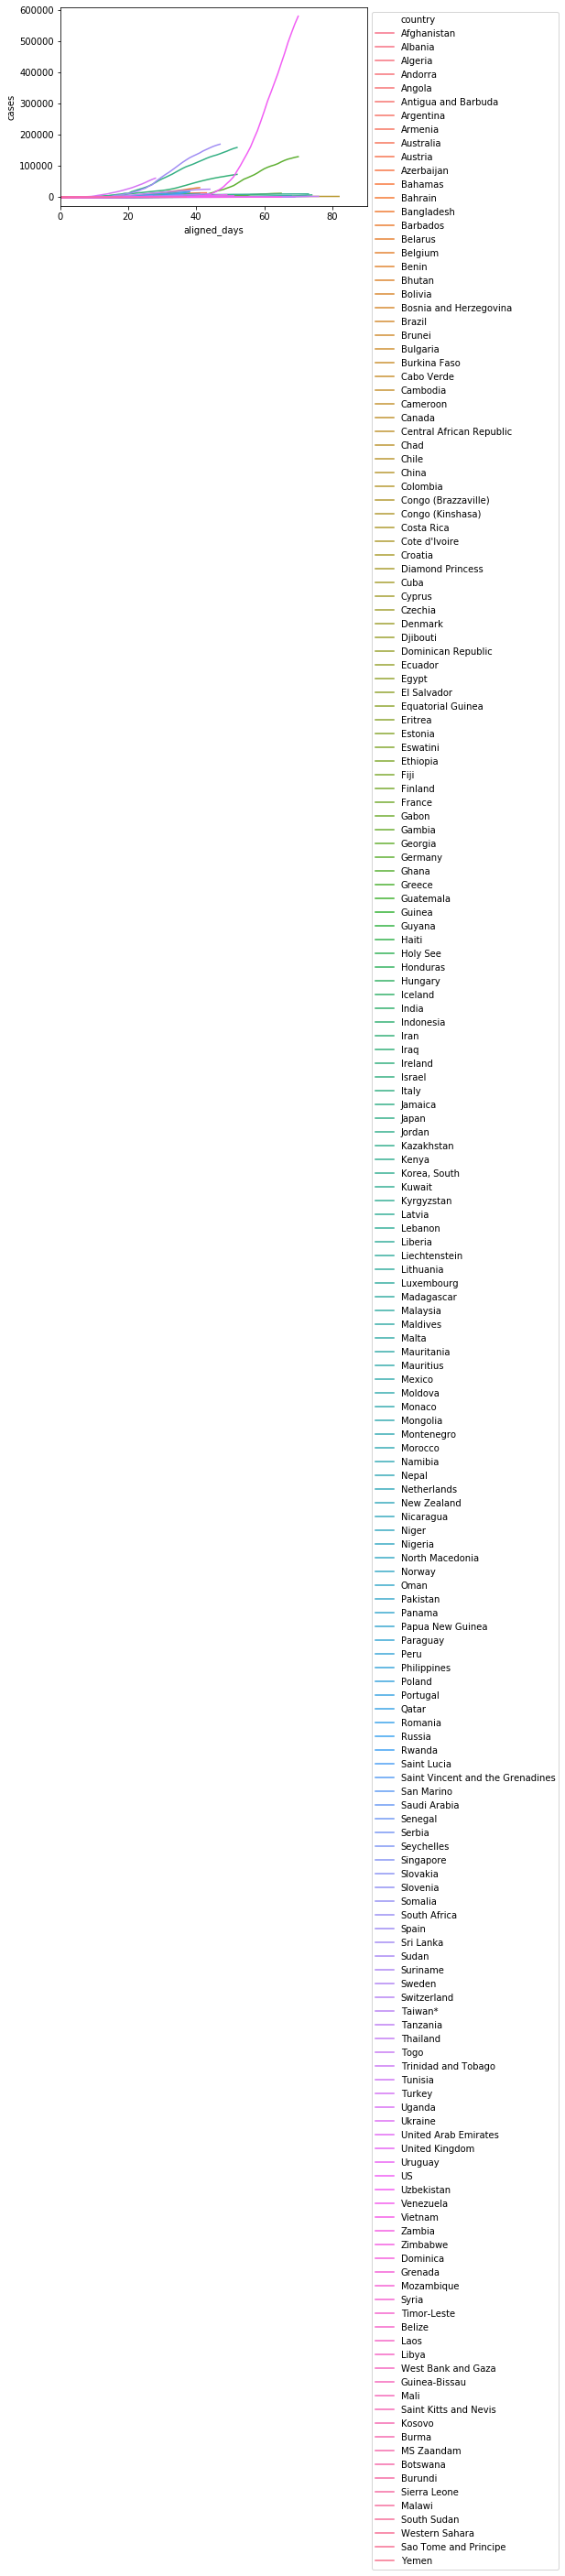

In [17]:
# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

ax = sns.lineplot(
    data=new_longdf, 
    x='aligned_days', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))

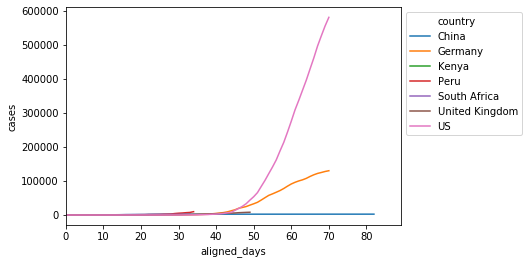

In [18]:
ax = sns.lineplot(
    data=new_longdf[
        new_longdf['country'].isin([
            'US', 'United Kingdom', 
            'Kenya', 'South Africa', 
            'Germany', 'Peru', 
            'China', 'South Korea'
        ])
    ], 
    x='aligned_days', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))

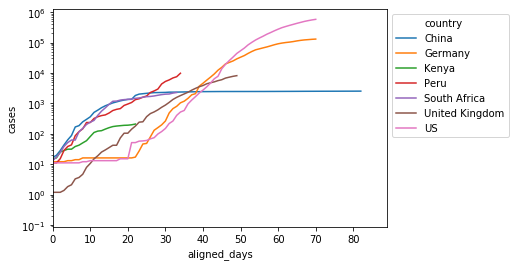

In [19]:
# what about log scale
ax = sns.lineplot(
    data=new_longdf[
        new_longdf['country'].isin([
            'US', 'United Kingdom', 
            'Kenya', 'South Africa', 
            'Germany', 'Peru', 
            'China', 'South Korea'
        ])
    ], 
    x='aligned_days', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
ax.set_yscale('log')

In [ ]:
# we could also group countries into regions (by adding a region column) and use 
# sns.FacetGrid to plot multiple of these plots with just a couple lines. 
# 